# Adaptive Noise Cancellation
Doctor, in trying to review the electroencephalogram (EEG) of a distracted graduate student, finds that the signal he would like to see has been contaminated by a 60-Hz noise source. He is examining the patient on-line and wants to view the best signal that can be obtained.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from keras import models
from keras import layers
from keras import optimizers


# Obtain the pure EEG Signal $S(k)$ from the data file *Data_EEG.txt* 

In [ ]:
# Architecture of ADALINE of order 1:

from IPython.display import Image
Image("Adaline_Adaptive_Filter.png")

In [ ]:
S= np.loadtxt('Data_EEG.txt',skiprows=1,unpack=True)
S_sqr=np.square(S)
Mean_S_sqr=np.mean(S_sqr)
n=len(S)

# Create the unfiltered signal $t(k)=S(k)+m(k)$ 
- $S(k)$: is the **pure EEG signal**
- $v(k)$: is the sampled sinusoidal electrical network signal (three times in a period) and considered as the input signal to ADALINE network and its output
- $m(k)$:  is the noisy signal comming from the electrical network. 
- $t(k)$: is the unfiltered signal (t(k)=S(k)+m(k))
- $a(k)$: is the estimation of the noisy signal m(k). 
- plot the pure signal $S(k)$ and unfiltered signal $T(k)$ in order to evaluate the filtering operated by ADALINE network.

In [ ]:
v=[]
m=[]
for i in range(30):
     v=np.concatenate((v,[1.2*np.sin(2*np.pi*(1/3)), 1.2*np.sin(2*np.pi*(2/3)), 1.2*np.sin(2*np.pi*(3/3))]))
     m=np.concatenate((m,[0.12*np.sin((2*np.pi*(1/3))+np.pi/2), 0.12*np.sin((2*np.pi*(2/3))+np.pi/2), 0.12*np.sin((2*np.pi*(3/3))+np.pi/2)]))

# Contaminated output signal    
t=S+m
#..........................
plt.figure(1,figsize=(12,5))
plt.plot(S)
plt.plot(t)
plt.legend(('original signal','noisy signal'),loc='upper left')
plt.title('Original and Noisy ECG Signal')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show()

# Filter Order Selection
ADALINE output $a(t)$ may be calculated based on:
- a first order model given in the figure using the mathematical expression: $a(k)=w_{11}v(k)+w_{12}v(k-1)$ 
- a second order model given by  the mathematical expression:  $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$

where the order is the number of retarded inputs signals used as input to neural network.

# First Order Filter Design:  Optimal Solution
- The optimal solution is obtained by minimizing **least mean square** (LMS) between 
the unfiltered signal T(k) and the output of the second order filter given 
by $a(k)=w_{11}v(k)+w_{12}v(k-1)$. For more details please **see course slide nr.19**.
- $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n(T(k)-a(k))\|$, where $n=dim(T)$
- Let us note: $x=[w_1, b]^T$ and $ z=[v,1]^T \Rightarrow a=x^Tz $ is the ADALINE output
- Solution:  $w=R^{-1}h$ where  $h=E[tz]$ and   $R=E[zz^T]$ 
- In our calculation we have considered that the biais value $b=0$

 



In [21]:
case="3ordre"
if case=='1ordre': # case of third order filter calculation
    n=len(t)-1
    w=np.array([0 , 0]) # initial values of synaptic weights
    b=0                 # initial values of baised value
    a=np.zeros(len(t)-1); # initial value of ADALINE network output
    V=np.array([v[1:90], v[0:89]]) #input signal
    T=t[1:90] # target signal 
    
    # Minimizing the square of difference between target signal and ADALINE network output
    # Optimal solution (see course slide nr. 19)
    Cov_R=np.cov(v[1:90], v[0:89])
    Cov_h=np.dot(V,T.T)/len(t[1:])
    w1=np.dot(inv(Cov_R),Cov_h.T)
    a1=np.dot(w1.T,V) # simulate the ADALINE for optimal solution on input signals
    e1=T-a1 # Initial filtered signal values
    
    plt.figure(2)
    plt.plot(S[1:90])
    plt.plot(e1)
    plt.legend(('original signal','filtered signal'),loc='upper right')
    plt.title('Filtered ECG Signal Obtained by Optimal Solution')
    plt.xlabel('number of samples')
    plt.ylabel('signal samples amplitude')
    plt.show()
    e=T-a
    J=[]


if case=='3ordre': # case of third order filter calculation
    n=len(t)-1
    w=np.array([0 ,0, 0]) # initial values of synaptic weights
    b=0                 # initial values of baised value
    a=np.zeros(len(t)-1); # initial value of ADALINE network output
    V=np.array([v[2:90],v[1:89], v[0:88]]) #input signal
    T=t[2:91] # target signal 
    
    # Minimizing the square of difference between target signal and ADALINE network output
    # Optimal solution (see course slide nr. 19)
    Cov_R=np.cov(v[2:90], v[1:89], v[0:88])
    Cov_h=np.dot(V,T.T)/len(t[2:])
    w1=np.dot(inv(Cov_R),Cov_h.T)
    a1=np.dot(w1.T,V) # simulate the ADALINE for optimal solution on input signals
    e1=T-a1 # Initial filtered signal values
    
    plt.figure(2)
    plt.plot(S[2:90])
    plt.plot(e1)
    plt.legend(('original signal','filtered signal'),loc='upper right')
    plt.title('Filtered ECG Signal Obtained by Optimal Solution')
    plt.xlabel('number of samples')
    plt.ylabel('signal samples amplitude')
    plt.show()
    e=T-a
    J=[]




ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# First Order Filter Design: ADALINE Design Based on Iterative Solution 
- The optimal solution is obtained by minimizing **least mean square** (LMS) between the unfiletered signal $T(k)$ considered as target signal and the output of ADALINE network given by $a(k)=w_{11}v(k)+w_{12}v(k-1)$. **For more details please see course slide nr.23**.
- There is no biaised value **b** considered for ADALINE
- Problem: $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n(T(k)-a(k))\|$, where $n=dim(T)$ and $a(k)=w_{11}v(k)+w_{12}v(k-1)$
- Problem: $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n e(t)\|$, where $n=dim(T)$
- Algorithm:
\begin{eqnarray}
w_i(k+1)&=&w_i(k)+2 \alpha e(k)V^T(k) \nonumber \\
b_i(k+1)&=&b_i(k)+2\alpha e(k)  \nonumber
\end{eqnarray}

# Second Order Filter Design: ADALINE Design based on Iterative Solution 
- The optimal solution is obtained by minimizing least mean square (LMS) between the unfiletered signal $T(k)$ considered as target signal and the output of ADALINE network given by $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$.

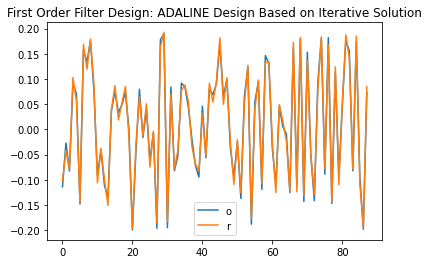

TypeError: 'NoneType' object is not callable

In [23]:
"""iterations=100000
learningRate=0.0005
for i in range(iterations):
    j=np.random.randint(1,n) #valeur aleatoire entre 1 et la taille de notre signal contaminé t
    J=np.concatenate((J,[j])) #construit sur l'axis j
    w=w+2*learningRate*e[j]*V[:,j] #ajustement du poids en fonction des entrées du signal
    a=np.transpose(w).dot(V) #construction des valeurs de sortie du reseau ADALINE
    e=T-a #construction du signal filtré 
    
plt.figure(2)#initialisation de deux courbes
plt.plot(S[1:90]) #affichage du signal pur
plt.plot(e) #affichage du signal filtré
plt.legend(("original signal","signal filtre"),loc="upper right")
plt.xlabel("nombre d'echantillons")
plt.ylabel("amplitude des echantillons de signal")
plt.show"""

N = 100000
alpha = 0.0005
V=np.array(([v[2:90], v[1:89], v[0:88]])) #input signal
w=np.array([0, 0, 0])  # initial values of synaptic weights
b=0
a=np.zeros(len(t)-2)
T=t[2:90]
e=T-a
for i in range(N):
    j=np.random.randint(1,n-1)
    J=np.concatenate((J,[j]))
    w=w+2*alpha*e[j]*V[:,j]
    a=np.transpose(w).dot(V)
    e=T-a

plt.figure(3)
plt.plot(S[2:90])
plt.plot(e)
plt.legend(('original'))
plt.title('First Order Filter Design: ADALINE Design Based on Iterative Solution')
plt.show()()




print("poid en solution optimal = ",w1)
print("poids gradient =",w)



    
    

poid en solution optimal =  [-0.03931743 -0.09834269]
poids gradient = [-0.04342341 -0.10060289]


# Filter Design: ADALINE Design based using KERAS
- The optimal solution is obtained by minimizing **least mean square** (LMS) between the unfiltered signal $T(k)$ considered as target signal and the output of ADALINE network. 
- KERAS allow to define optimization algorithms and paremetters


 # Simulate ADALINE
 - obtain the synaptic weights from network model via **model.get_weights()** and propagate the input signal to the ADALINE output **$a(t)$** using the mathematical expression: $a(k)=w_{11}v(k)+w_{12}v(k-1)$ or  $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$ corresponding to first or second order ADALINE flter. 

# Simulate ADALINE
 - propagate the input signal using  KERAS command **model.predict(input_NN)** in order to obtain the ADALINE output **$a(t)$**